In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import lambertw

In [2]:
enz = np.array(pd.read_table("data/Enzyme only/expt 5-2/AP0pt05ugmL-1_4MUP2mM013.txt"),dtype=np.double).T

In [3]:
time=enz[0]
enz_data = enz[1:]
print(enz_data.shape)

(1240, 181)


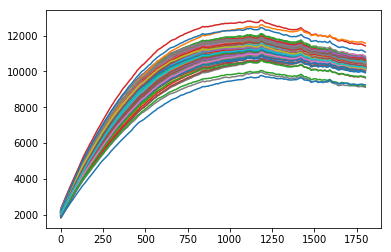

In [4]:
for data in enz_data[:181]:
    plt.plot(time,data)

/Users/hstrey/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


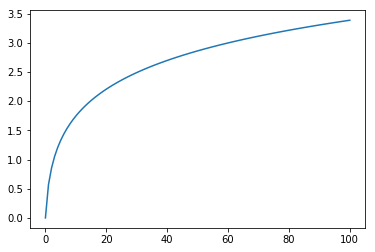

In [6]:
x=np.linspace(0,100,100)
plt.plot(x,lambertw(x))